In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate

%matplotlib inline



In [23]:
Q = 2.4578e6
Te = np.arange(0, Q, 1000)
#Te = np.random.uniform(0,Q,1000)
c = 3e8   #speed of light
#Q = 2.4578e6
Z = 54    #atomic number of TPC medium
A = 131   #atomic mass of TPC medium
z = 1     #charge of the particle
re =2.8e-13   #radius of electron in meters
me = 511e3/(c**2)    # mass of electron in eV
M = 938e6/(c**2)     # mass of Proton
M2 = 3.72e9/(c**2)  # mass of alpha
M3 = 105e6/(c**2)   # mass of muon
Na = 6.02e23    # avagrado number mol-1


def N(t):
    return (1/c**5)*(t**2+2*t*me*c**2)**(1/2)*(Q-Te)**2*(Te+me*c**2)

def D(E):
    return E*(Q-E)**5*(1+2*E+4/3*E**2+1/3*E**3+1/30*E**4)

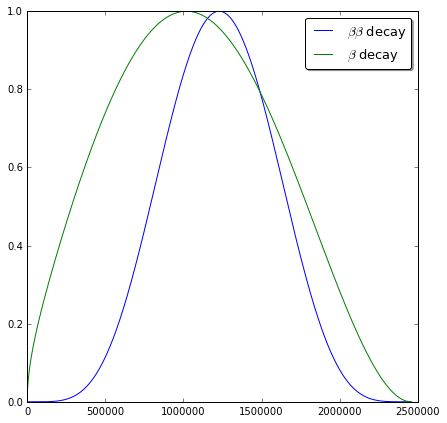

In [3]:
plt.figure(figsize=(7,7))
plt.plot(Te,D(Te)/max(D(Te)),label=r'$\beta \beta$ decay')
plt.plot(Te,N(Te)/max(N(Te)),label=r'$ \beta$ decay')
plt.legend(loc='upper right',fontsize=13,shadow=True, fancybox=True)

#plt.xlim(2.3e6,2.6e6)
plt.show()

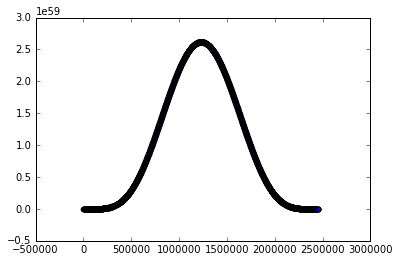

In [4]:
plt.scatter(Te,D(Te))
#plt.xlim(2.3e6,2.6e6)
plt.show()

In [21]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))/(sig*np.sqrt(2*3.142))
def D(E):
    A = E*(Q-E)**5*(1+2*E+4/3*E**2+1/3*E**3+1/30*E**4)
    return A#/max(A)*1000
def D2(E):
    E = E+250e3
    A = E*(Q-E)**5*(1+2*E+4/3*E**2+1/3*E**3+1/30*E**4)
    A[A<0] = 0
    return A#/sum(A)*100000

In [17]:
min(D(Te))
np.where(D(Te) == 1.2822787148055551e+39)

(array([10190]),)

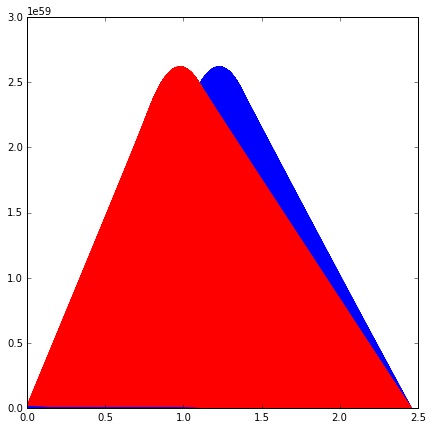

In [22]:
plt.figure(figsize=(7,7))
plt.plot(Te/1e6,D(Te))#/max(D(Te)))
#plt.plot(Te,gaussianNor(Te,1.3e6,50e3))
#QW = D(Te)/max(D(Te)) - gaussianNor(Te,1.3e6,50e3)
#A = D2(Te)
#A[A<0] = 0
plt.plot(Te/1e6,D2(Te),color='r')
#plt.xlim(0.6,2.8)
#plt.axvline(Te[10190])
plt.show()

In [13]:
Te = np.random.uniform(0,Q,12000)
testBin = np.linspace(0, 2.5e6,endpoint=True, num=101)
testBin[2] - testBin[1]

25000.0

In [14]:
Out = np.array([])
A = max(D(Te))
LL = len(Te)
#LL=300
for x in range(0,LL):
    X = Te[x]
    Y = D(X)/A *1000
    Full = np.ones(Y)*X
    Out = np.append(Out,Full)

KeyboardInterrupt: 

In [ ]:
Y

In [ ]:
plt.hist(Out,bins=testBin)
#plt.plot(Te,D(Te)/A*100*25,color='r')

plt.show()

In [ ]:
plt.hist(Te,bins=testBin,weights=D(Te))
plt.hist(Te,bins=testBin,weights=D2(Te))

plt.show()

In [ ]:
len(Te[1::10])

In [26]:
# find the resolution function
Prcnt = np.array([6.75, 5.51, 2.35, 0.7])
Enrgy = np.array([29.6e3, 41.5e3, 511e3, 2.45e6])
DeltaE= Prcnt*Enrgy/100
SIGMAS= DeltaE/2.355

In [27]:
SIGMAS

array([  848.40764331,   970.97664544,  5099.1507431 ,  7282.37791932])

In [28]:
testBin = np.linspace(0, 2.5e6,endpoint=True, num=101)

hist, bin_edges = np.histogram(Te,weights=D(Te),bins=testBin)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
testBin[2] - testBin[1]

25000.0

//anaconda/envs/py35/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


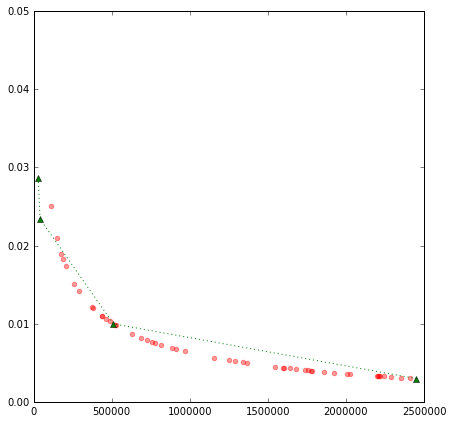

In [29]:
x = Enrgy[2:4]
y = (SIGMAS/Enrgy)[2:4]
def srt(t,a,b):
    return a+b/np.sqrt(t)
popt,pcov =curve_fit(srt,  x,  y)
plt.figure(figsize=(7,7))
plt.plot(Enrgy,(SIGMAS/Enrgy),'g^:',label='data')
plt.scatter(Te[1::20],srt(Te[1::20],*popt),color='r',alpha=0.4)
plt.xlim(0,2.5e6)
plt.ylim(0,0.05)
plt.show()

[]

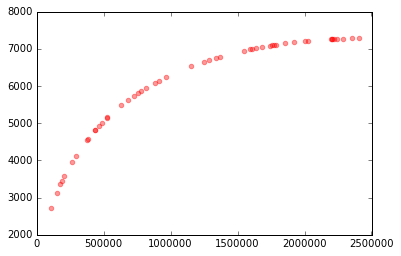

In [30]:
plt.scatter(Te[1::20],srt(Te[1::20],*popt)*Te[1::20],color='r',alpha=0.4)
plt.xlim(0,2.5e6)
plt.plot()

In [ ]:
NewSigma = srt(Te,*popt)*Te

In [ ]:
SIGMAS

In [ ]:
srt(511e3,*popt)*511e3

In [31]:
Smeared = np.array([])
for q in range(0,len(Out)):
    mu = Out[q]
    sigma = 0.05*mu#srt(mu,*popt)*mu*2#srt(bin_centres[q],*popt)*bin_centres[q]
    smrd = np.random.normal(mu, sigma, 1)
    Smeared = np.append(Smeared,smrd)

In [ ]:
def smearing(Arry,sigma, size=1):
    LL = len(Arry)
    Out = np.array([])
    for x in range(0,LL):
        Point = Arry[x]
        Sigma = sigma[x]
        smr   = np.random.normal(Point, sigma, size)
        Out = np.append(Out,smr)
    return Out

In [ ]:
len(Out)

In [ ]:
len(Smeared)

In [ ]:
Smeared

In [32]:
testBin = np.linspace(0, 2.5e6,endpoint=True, num=101)
hist, bin_edges = np.histogram(Out,bins=testBin)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
histS, bin_edgesS = np.histogram(Smeared,bins=testBin)
bin_centresS = (bin_edgesS[:-1] + bin_edgesS[1:])/2

In [33]:
5*2.355

11.775

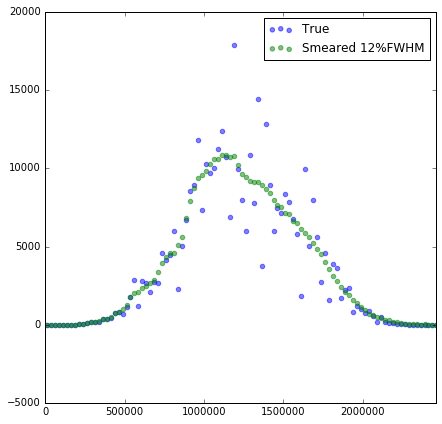

In [35]:
plt.figure(figsize=(7,7))
plt.scatter(bin_centres,hist,alpha=0.5,color='b',label='True')
plt.scatter(bin_centresS,histS,alpha=0.5,color='g',label='Smeared 12%FWHM')
plt.xlim(0,Q)
#plt.ylim(0,3200)
plt.legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

plt.scatter(bin_centres,hist,alpha=0.5,color='b',label='True')
plt.scatter(bin_centresS,histS,alpha=0.5,color='g',label='Smeared 47%FWHM')

plt.ylabel("Counts",fontsize=26)
plt.xlabel("Energy MeV",fontsize=26)
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=5, width=1, which='minor')
xmajor_ticks = np.arange(0, Q, 500e3)
xminor_ticks = np.arange(0, Q, 100e3)
ymajor_ticks = np.arange(0, 3000, 1000)
yminor_ticks = np.arange(0, 3000, 500)
ax.tick_params(axis = 'x', which = 'major', direction='out',width=2,length=6,top="off",right='off')
ax.tick_params(axis = 'x', which = 'minor', direction='out',width=1,length=3,top="off",right='off')
ax.tick_params(axis = 'y', which = 'major', direction='in',width=2,length=6,top="off",right='off')
ax.tick_params(axis = 'y', which = 'minor', direction='in',width=2,length=4,top="off",right='off')
ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor = True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor = True)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.xlim(0,Q)
plt.ylim(0,3200)
plt.grid(True)
plt.tight_layout()

#plt.savefig('/Users/austinmcdonald/Desktop/energyNoCut.pdf')
plt.show()

In [ ]:
#testBin = np.linspace(0, 2.5e6,endpoint=True, num=1001)
plt.hist(Out,bins=testBin,alpha=0.5)
plt.hist(Smeared,bins=testBin,alpha=0.5)
#plt.plot(Te,D(Te)/A*100*25,color='r')
#plt.xlim(1.5e5,2e5)
plt.show()

In [ ]:
testBin = np.linspace(0, 2.5e6,endpoint=True, num=51)
#plt.hist(D(Te),bins=testBin)#,weights=D(Te))
#plt.hist(Te,bins=testBin,weights=D(Te))
plt.hist(Smeared,bins=testBin,weights=D(Smeared))

plt.show()

In [ ]:
Smeared = np.array([])
for q in range(0,len(bin_centres)):
    mu = bin_centres[q]
    sigma = NewSigma[q]#srt(bin_centres[q],*popt)*bin_centres[q]
    Height = hist[q]/(np.sqrt(2*np.pi)*sigma)
    smrd = np.random.normal(mu, sigma, Height)
    Smeared = np.append(Smeared,smrd)

In [ ]:
Smeared

In [ ]:
histS, bin_edgesS = np.histogram(Smeared,bins=testBin)
bin_centresS = (bin_edgesS[:-1] + bin_edgesS[1:])/2

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(bin_centres/1e6,hist,color='b')
plt.scatter(bin_centresS/1e6,histS,color='r')
#plt.xlim(2.3e6,2.6e6)
#plt.semilogy()
#plt.hist(Smeared,bins=testBin)
plt.show()

In [ ]:
plt.plot(bin_centres,hist/histS,color='b')


In [ ]:
print('mu = ',mu)
print('sig = ',sigma)
print('H = ',Height)

In [ ]:
F=20
mu = bin_centres[F]
sigma = NewSigma[F]#srt(bin_centres[q],*popt)*bin_centres[q]
Height = hist[F]/(np.sqrt(2*np.pi)*sigma)
smrd = np.random.normal(mu, sigma, Height)

plt.figure(figsize=(7,7))
plt.hist(smrd)
#plt.scatter(bin_centres,hist,color='k')
plt.xlim(440e3,1e6)
plt.show()

In [ ]:
plt.figure(figsize=(7,7))
Testx = np.linspace(-50,50,100)
Testy = gaussian(Testx,0,5)
plt.plot(Testx,Testy*50)
plt.show()
dx=Testx[2]-Testx[1]
sum(Testy*50)*dx

In [ ]:
(np.sqrt(2*np.pi)*4)*5

In [ ]:
plt.figure(figsize=(7,7))
Testx = np.linspace(0,Q,1000)
Testy = gaussian(Testx,1e6,50e3)*1e8
plt.plot(Testx,Testy)
plt.show()
dx=Testx[2]-Testx[1]
sum(Testy*50)*dx

In [ ]:
testBinT = np.linspace(0, 2.5e6,endpoint=True, num=1001)

histT, bin_edgesT = np.histogram(Testx,weights=Testy,bins=testBinT)
bin_centresT = (bin_edgesT[:-1] + bin_edgesT[1:])/2
testBinT[2] - testBinT[1]

In [ ]:
Smeared = np.array([])
for q in range(0,len(bin_centresT)):
    mu = bin_centresT[q]
    sigma = 30000#*NewSigma[q]#srt(bin_centres[q],*popt)*bin_centres[q]
    Height = histT[q]#/(np.sqrt(2*np.pi)*sigma)
    smrd = np.random.normal(mu, sigma, Height)
    Smeared = np.append(Smeared,smrd)

In [ ]:
histST, bin_edgesST = np.histogram(Smeared,bins=testBinT)
bin_centresST = (bin_edgesST[:-1] + bin_edgesST[1:])/2

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(bin_centresT/1e6,histT,color='b')
plt.scatter(bin_centresST/1e6,histST,color='r')
plt.xlim(0.5,1.5)
#plt.ylim(0,0.00002)
#plt.semilogy()
#plt.hist(Smeared,bins=testBin)
plt.show()

In [ ]:
qq = np.where(ffit == max(ffit))[0][0]
Te[qq]

In [ ]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))/(sig*np.sqrt(2*3.142))

In [ ]:
len(Te)

In [ ]:
QWE = np.linspace(1,3e6,30)

In [ ]:
for a in range(0,len(QWE)):
    plt.plot(Te,gaussian(Te,QWE[a],ffit),color='b')
plt.ylim(0,0.00008)
plt.xlim(2.35e6,2.4e6)
plt.show()

In [ ]:
2370000-2390000

In [ ]:
20000/2.4e6

In [ ]:
N = len(Te)
L = min(Te)
R = max(Te)
dx = float(R-L)/N
sigma = 1/2.355
gx = np.arange(-3*sigma, 3*sigma, dx)
#gaussian = np.exp(-(Totx/1e6/sigma)**2/2)
aaa = D(Te)/max(D(Te))
bbb = gaussian(Te,1e6,ffit)/max(gaussian(Te,0,ffit))

result = np.convolve(D(Te), gaussian(Te,1e5,ffit), mode="full")/sum(gaussian(Te,0,ffit))

In [ ]:
result

In [ ]:
#X=Te  Y=D(Te)
def Con(X,Y,N,ffit):
    L = len(X)
    chunks = L/N
    XX = np.array_split(X,N)
    YY = np.array_split(Y,N)
    FF = np.array_split(ffit,N)
    ANS = np.array([])
    for q in range(1,N-1):
        xs = XX[q]
        ys = YY[q] 
        fs = FF[q]
        M = np.mean(xs)
        result = np.convolve(ys, gaussian(xs,M,fs), mode="full")/sum(gaussian(xs,M,fs))
        ugg = len(result)
        result = result[0:ugg/2+1]
        ANS = np.append(ANS,result)
    return ANS

In [ ]:
#X=Te  Y=D(Te)
def Con(X,Y,N,ffit):
    L = len(X)
    chunks = L/N
    XX = np.array_split(X,N)
    YY = np.array_split(Y,N)
    FF = np.array_split(ffit,N)
    ANS = np.array([])
    for q in range(1,N-1):
        L1 = len(XX[q-1])
        L2 = len(XX[q])
        L3 = len(XX[q+1])
        xs = np.append(XX[q-1],XX[q])
        xs = np.append(xs,XX[q+1])
        ys = np.append(YY[q-1],YY[q])
        ys = np.append(ys,YY[q+1])
        fs = np.append(FF[q-1],FF[q])
        fs = np.append(fs,FF[q+1])
        M = np.mean(xs)
        result = np.convolve(ys, gaussian(xs,M,fs), mode="full")/sum(gaussian(xs,M,fs))
        ugg = len(result)
        result = result[2*L1:2*L1+L2+1]
        #result = result[0:ugg/2]
        ANS = np.append(ANS,result)
    return ANS

In [ ]:
TEE = Con(Te,D(Te)/max(D(Te)),15,ffit)
xx = np.arange(0,len(TEE))
plt.plot(xx,TEE)

In [ ]:
N=10
XX = np.array_split(Te,N)
YY = np.array_split(D(Te),N)
FF = np.array_split(ffit,N)
ANS = np.array([])
for q in range(1,N-1):
    L1 = len(XX[q-1])
    L2 = len(XX[q])
    L3 = len(XX[q+1])
    xs = np.append(XX[q-1],XX[q])
    xs = np.append(xs,XX[q+1])
    ys = np.append(YY[q-1],YY[q])
    ys = np.append(ys,YY[q+1])
    fs = np.append(FF[q-1],FF[q])
    fs = np.append(fs,FF[q+1])
    M = np.mean(xs)
    result = np.convolve(ys, gaussian(xs,M,fs), mode="full")/sum(gaussian(xs,M,fs))
    ugg = len(result)
    result = result[2*L1:2*L1+2*L2+1]
    ANS = np.append(ANS,result)


In [ ]:
len(result)

In [ ]:
L1

In [ ]:
len(xs)

In [ ]:
len(TEE)

In [ ]:
len(Te)

In [ ]:
TEE = Con(Te,D(Te),20,ffit)
xxx = testBin = np.linspace(0, 2.5e6,endpoint=True, num=len(TEE))

plt.plot(Te,D(Te),color='k')
plt.plot(xxx,TEE)
#plt.plot(Te,result[0:2458],color='r')
#plt.xlim([2.4e6,2.46e6])
plt.show()

In [ ]:
len(Totx)

In [ ]:
len(result[0:4955-2477])